In [18]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
sys.version

'3.9.5 (default, May 18 2021, 14:42:02) [MSC v.1916 64 bit (AMD64)]'

In [20]:
import yfinance as yf
yf.pdr_override()
import pandas as pd
from matplotlib import pyplot as plt
import datetime

In [21]:
stocks = yf.download("CVNA VTI SPY VOO VXUS BND SBUX MSFT AAPL AMD", start="2021-01-01", end=date.today())

[*********************100%***********************]  10 of 10 completed


In [22]:
adj_close = stocks['Adj Close']
adj_close.head()

,AAPL,AMD,BND,CVNA,MSFT,SBUX,SPY,VOO,VTI,VXUS
Date,,,,,,,,,,
2021-01-04,128.997803,92.300003,87.464432,236.270004,216.689423,102.256081,367.586090,337.838684,191.232742,60.372089
2021-01-05,130.592697,92.769997,87.315453,255.580002,216.898438,102.593300,370.117767,340.060852,192.777588,61.249939
2021-01-06,126.196747,90.330002,86.928146,250.830002,211.274414,103.337158,372.330505,342.123566,194.511826,61.579128
2021-01-07,130.502991,95.160004,86.749382,270.160004,217.286652,102.504036,377.862427,347.235535,197.631409,61.838497
2021-01-08,131.629379,94.580002,86.669922,278.440002,218.610550,104.805046,380.015381,349.188690,198.588226,62.626564


<ipython-input-23-fe0616697615>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_close[symbol] = (adj_close[symbol]/adj_close[symbol].loc[adj_close[symbol].first_valid_index()] - 1) * 100


<AxesSubplot:xlabel='Date'>

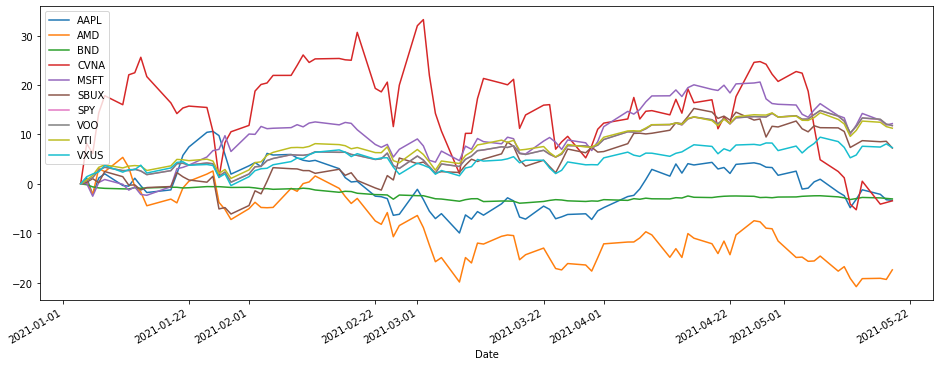

In [23]:
for symbol in adj_close:
    adj_close[symbol] = (adj_close[symbol]/adj_close[symbol].loc[adj_close[symbol].first_valid_index()] - 1) * 100

adj_close.plot(figsize=(16,6))

In [6]:
import plotly.express as px 

# Loading the iris dataset 
melted = pd.melt(adj_close, ignore_index = False)

fig = px.line(melted,y="value",  
              color="variable") 
fig.show()